#                   # Exploratory Data Analysis : TITANIC DATA

__we are going to puzzle out and provide insights for__

_*Passengers on the trip (age,gender,class,..)_

_*Where did they come from?_

_*Type of travel(single/family)_

_*How did people survive_

_At the starting of each cell the process and the logic explained starting with # & at the end of the each task the analyzed data is provided with explaination_

In [1]:
#Importing some important libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sbn
%matplotlib inline

In [2]:
#All the important libraries are imported and we are ready to go now..

In [3]:
#reading the data 
data= pd.read_csv('titan_train.csv')

In [4]:
#sample data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
#some statisticks of  the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ALONER
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,20.481625,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400,10.000000


__found out some error in the fare-section, 75th quantile  of fair is 31.00 and maximum fare is 512.329__

In [75]:
#dealing with outliers
data.Fare.quantile(0.25),data.Fare.quantile(0.75)

(7.9104, 31.0)

In [76]:
#whisker logic into the field
IQR = data.Fare.quantile(0.75)-data.Fare.quantile(0.25)
IQR

23.0896

In [77]:
#calculating whiskers
W1=data.Fare.quantile(0.25)-(1.5*IQR)
W2=data.Fare.quantile(0.75)+(1.5*IQR)
W1,W2

(-26.724, 65.6344)

In [9]:
# Fares which are greater than 65.6344 are invalid

In [10]:
#replacing the invalid entries with maxium fare 
data['Fare'].loc[data['Fare']>65.63] =W2

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_29880\3888624192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'].loc[data['Fare']>65.63] =W2


# INSIGHTS OF PASSENGERS

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# TASK 1

##  AGE, CLASS & SEX

D:\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


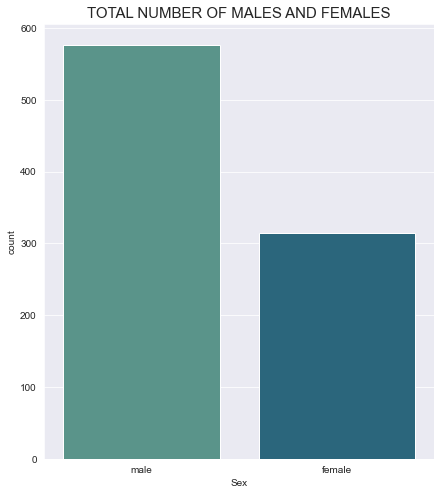

In [25]:
sbn.countplot(data.Sex, palette="crest")
sbn.set_style("darkgrid")
mat.title("TOTAL NUMBER OF MALES AND FEMALES",fontsize=15);

In [13]:
#p.s ignore the popouts..!

In [14]:
# Bieng more specific 
#Function to detect if a person is a man, woman or child.
def man_wom_chi(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
data['TYPE'] = data.apply(man_wom_chi,axis=1)

In [15]:
data.TYPE.value_counts()

male      537
female    271
child      83
Name: TYPE, dtype: int64

### __i.e there are a total of 537 males and 271 females  and 83 children in the train__

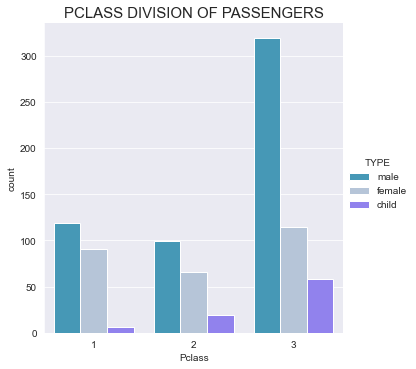

In [92]:
#socio-economy classes and the count 
sbn.catplot(x='Pclass' ,data=data, kind='count', hue='TYPE', palette=sbn.color_palette(['#33a1c9','#b0c4de','#8470ff']))
mat.title('PCLASS DIVISION OF PASSENGERS', fontsize=15);

### __It seems to be more number of passengers In class 3 are higher__

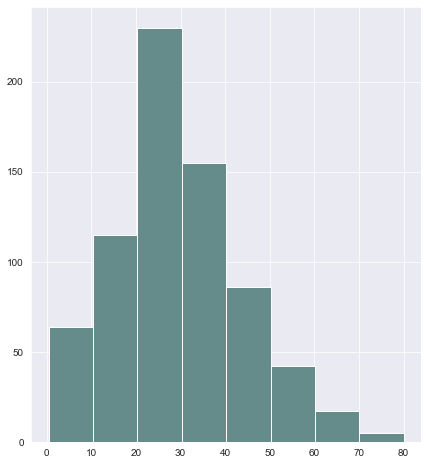

In [26]:
#age groups of passengers
mat.hist(data.Age, color='#668b8b', bins=8);

__" Above in the histogram plot we can see that  the maximum number of passengers are between the age group 20 -30 years__

# TASK2:

# WHERE DID THE PASSEGERS COME FROM? 

__The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).__



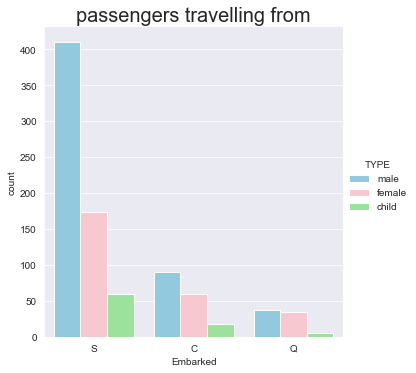

In [83]:
#creating a catplot with kind as count  which gives us total count of passengers from different citys
sbn.catplot(x='Embarked', kind='count', hue='TYPE', data=data,palette=sbn.color_palette(['skyblue','pink','lightgreen']))
mat.title('passengers travelling from', fontsize=20);

__The maximun number of passengers are from Southhampton followed by cherbourg then Queenstown__

# TASK 3:

# ARE THEY TRAVELING ALONE?

In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TYPE'],
      dtype='object')

In [63]:
# sibSp refers to siblings and parch refers to parents
# for our comfort we create a new column called "WITH" to know if the passenger is alone or not
data["ALONER"]=data.SibSp+data.Parch

''

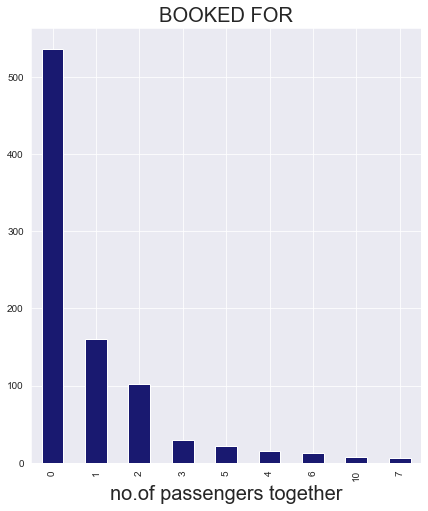

In [84]:
##ploting
data.ALONER.value_counts().plot(kind='bar', color='#191970')
mat.rcParams["figure.figsize"]=[7,8]
mat.xlabel('no.of passengers together', fontsize=20)
mat.title('BOOKED FOR',fontsize=20)
;

__"above graph gives the information about the count of passengers travelling with their family members and count of thir family members is shown on x axis"__

In [85]:
#assigning with yes and no values if they are traveling alone and with members together respectively
data['ALONER'].loc[data['ALONER']>=1]= 'NO'

C:\Users\HP 15-DC0084TX\AppData\Local\Temp\ipykernel_29880\2032834104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ALONER'].loc[data['ALONER']>=1]= 'NO'


In [50]:
data['ALONER'].loc[data["ALONER"]==0]='YES'

In [51]:
data['ALONER'].value_counts()

YES    537
NO     354
Name: ALONER, dtype: int64

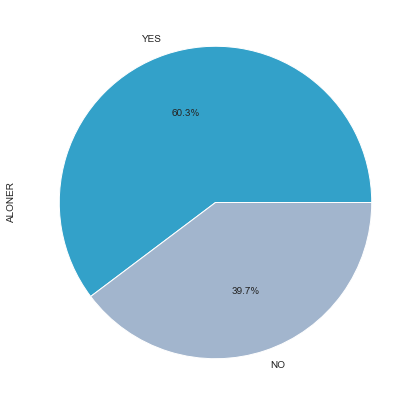

In [61]:
data['ALONER'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['#33a1c9','#a2b5cd']);

__Almost 537 passengers were traveling alone & 60 percent of tickets were booked by single travellers__

# TASK 4:

# THE GAME OF SURVIVAL 

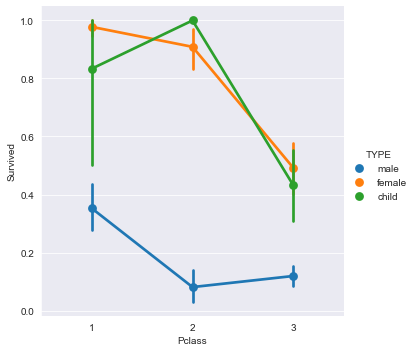

In [57]:
sbn.catplot(x='Pclass', y='Survived', data=data, hue='TYPE', kind='point')

__High importance was given to Children and Women as shown in the movie, we can see here the survival of children and women of 1st & 2nd classes is more, also we can see that men had less chance of survival especially men from the 2nd and 3rd classes__